# Credit Default Analysis with Machine Learning

* The notebook is created to predict consumer credit default with machine learning techniques. The dataset is download from UCI public dataset. 

### Goal and Plan

* In this project, I'll follow the below process, based on the data we have to predict whether the consumer will make a credit default in the future or not.

   1. Data exploration
   2. Data cleaning
   3. Data Preprocessiong
   4. Prediction with Machine Learning Modeling
   5. Evaluation

### Variables 

#### There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... * 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



## Data Import and Exploration

* Import data from CSV file
* Go over the dataset with Pandas package
* Visualize dataset with Matplotlib and Seaborn

In [1]:
# import basic python libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

C:\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load the UCI data from CSV file

df = pd.read_csv("./UCI_Credit_Card.csv")
print("Number of data in this dataset", df.shape[0])
print("Number of features in this dataset", df.shape[1])
df.head() # show first 5 rows of the dataset

Number of data in this dataset 30000
Number of features in this dataset 25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Table of dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

<br /> 
<font size=3>

* From this dataset we can see, the categorical data has already been transfered to numberical data 0,1,2... for example, the "SEX" category, "0" represent "male", "1" represent "female"
* There are three cateforical data, "SEX", "EDUCATION", "MARRIAGE", all of them have been transfered.

<br />

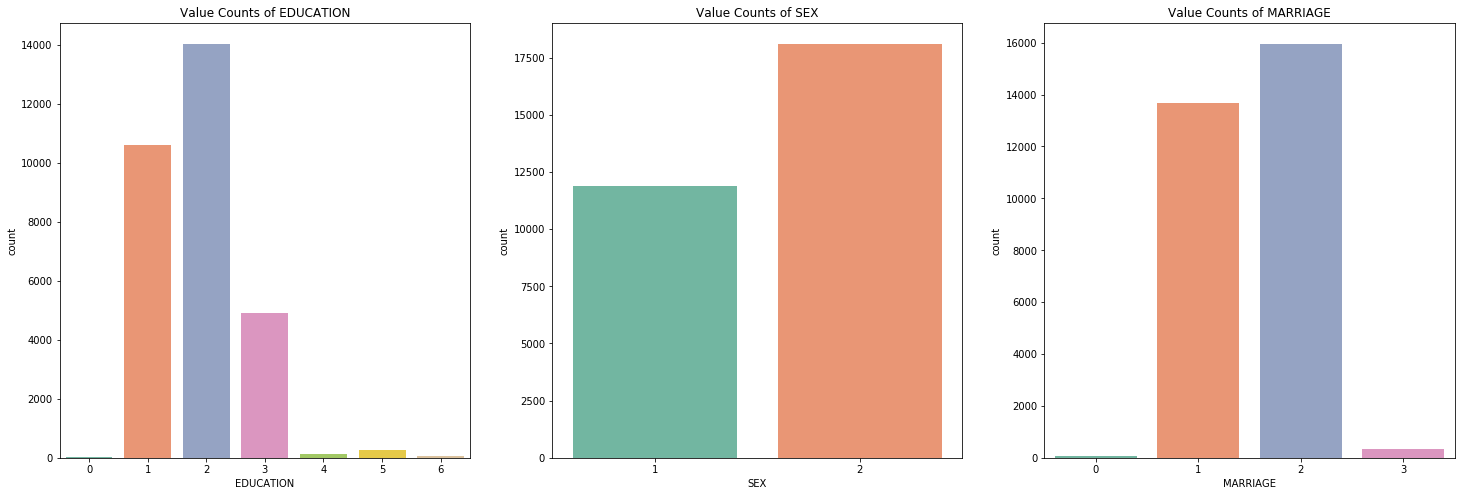

In [4]:
features = ['EDUCATION','SEX','MARRIAGE']

plt.figure(figsize=(25,8))
for i in range(len(features)):
    plt.subplot(1,3,i+1)
    sns.countplot(df[features[i]], palette='Set2');
    plt.title('Value Counts of {}'.format(features[i]))

Number of customer who did not pay the car:  23364 , 77.88 % of all customer
Number of customer who pay the car:  6636 , 22.12 % of all customer


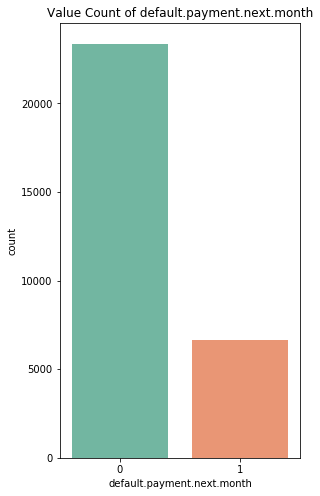

In [5]:
features = ['default.payment.next.month']

plt.figure(figsize=(25,8))
plt.subplot(1,5,i+1)
sns.countplot(df['default.payment.next.month'], palette='Set2')
plt.title('Value Count of {}'.format(features[0]))

array = df['default.payment.next.month'].value_counts()
sum_array = array[0] + array[1]

print('Number of customer who did not pay the car: ', array[0], ',', (array[0]/sum_array)*100,'% of all customer')
print('Number of customer who pay the car: ', array[1], ',', (array[1]/sum_array)*100,'% of all customer')

<br /> 
<font size=3>
    In this dataset we can clearly see that the '0' data is almost four times more than the '1' data, so we can conclude that this dataset is an imbalance dataset. We need some process to handle this dataset.
    
<br /> 

Text(0.5,1,'Value Counts of AGE')

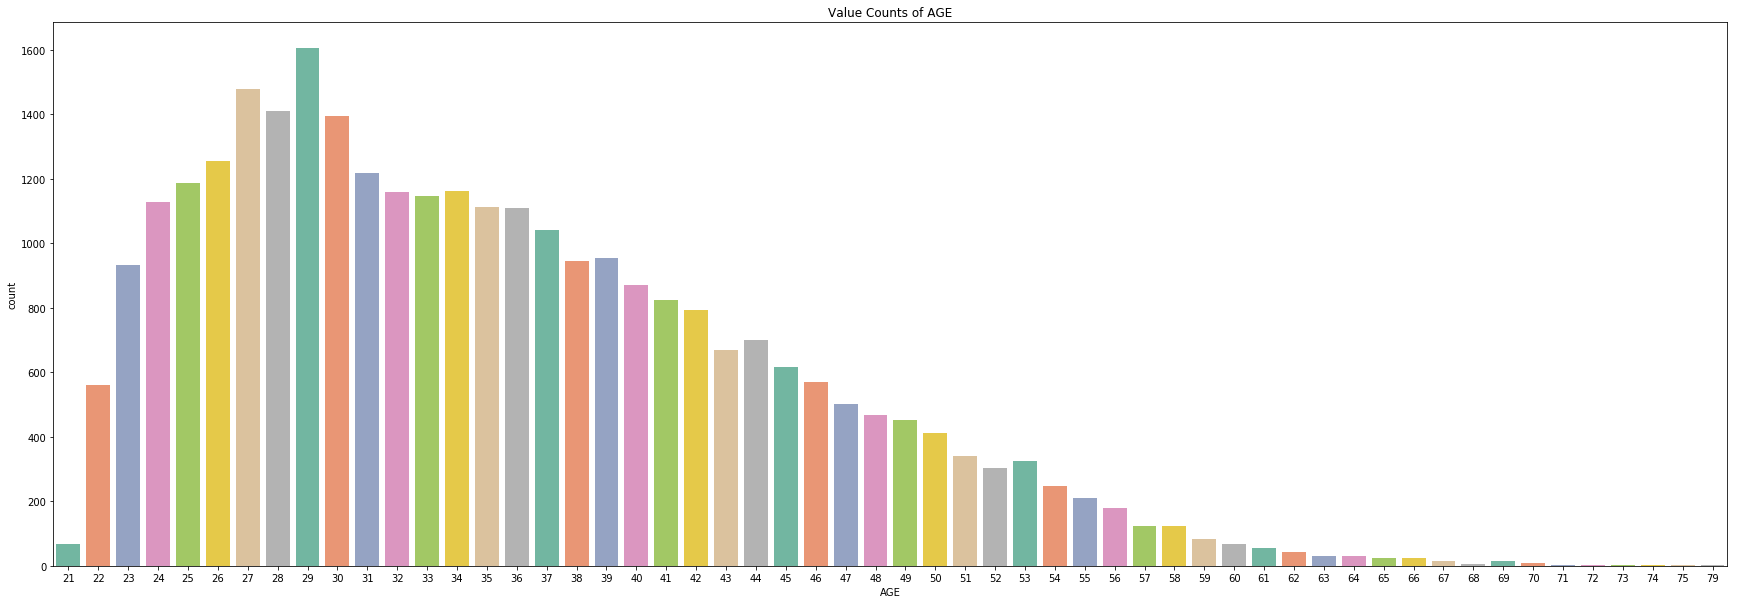

In [6]:
plt.figure(figsize=(30,10))
sns.countplot(df['AGE'], palette='Set2');
plt.title('Value Counts of AGE')

In [7]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [9]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
# check the limit balance data
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

### Data Preprocessing
<font size=3> 
* Data preprocessiong including data cleaning, dealing with outlier, split dataset into training and testing etc.

<font size=3> From the data explory, we can find several category like "Bill_AMT*" has vary large value, so we need to scale it down to ensure there is no dominate data in the dataset

In [11]:
from sklearn import preprocessing
df['LIMIT_BAL'] = preprocessing.scale(df['LIMIT_BAL'])
df['LIMIT_BAL'].head()

0   -1.136720
1   -0.365981
2   -0.597202
3   -0.905498
4   -0.905498
Name: LIMIT_BAL, dtype: float64

In [12]:
features = [['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
for i in range(len(features)):
    df[features[i]] = preprocessing.scale(df[features[i]])

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,-1.136720,2,2,1,24,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,26,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,34,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,37,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,57,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


Second feature we need to process is the AGE feature, it various from 21 to 81. So I'll category it in three categories ['young', 'middle', 'senior'] based on the age bins. 

In [13]:
#create new features based on different age bins
# Young = 21 ~ 35, Middle = 35~60, Senior = 60~81
#1 ,2 ,3 
df['AGE'] = pd.cut(df.AGE, [21,35,60,81], labels=["young","middle","senior"])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,-1.136720,2,2,1,young,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,young,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,young,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,middle,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,middle,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


Text(0.5,1,"Value Count of ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']")

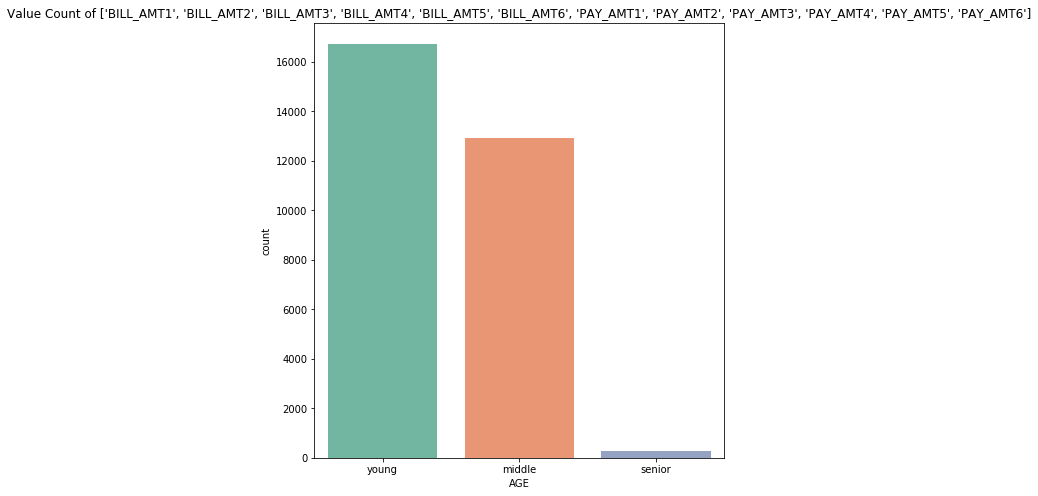

In [14]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,i+1)
sns.countplot(df['AGE'], palette='Set2')
plt.title('Value Count of {}'.format(features[0]))

In [15]:
#Then I use on-hot encode to transfer the cateforical data to numerical data
df.AGE = pd.Categorical(df.AGE).codes
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,-1.136720,2,2,1,0,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,0,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,1,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,1,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


### Split data into training and testing subset

In [16]:
df = df.rename(columns={'default.payment.next.month': 'DEF_PAY'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,-1.136720,2,2,1,0,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,0,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,1,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,1,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [17]:
#first of all we need to find out what is input and what is output
#clearly the output data is whether is default or not, 1 for no, 0 for yes
# and ID feature is not useful so I just frop it off
Y = df['DEF_PAY']
X = df.drop(['DEF_PAY','ID'], axis=1)

In [18]:
X.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,2,2,1,0,2,2,-1,-1,-2,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,2,2,2,0,-1,2,0,0,0,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,2,2,2,0,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,2,2,1,1,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,1,2,1,1,-1,0,-1,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [19]:
#using sklearn to split training and test dataset. 65% of the data goes into training dataset.
from sklearn.cross_validation import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.35, random_state=0) 

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
y_train.value_counts()

0    15123
1     4377
Name: DEF_PAY, dtype: int64

## Fit the data into Machine Learning Model

<font size=3>
* As we can see from the size of Y in training dataset. The '0' value still much more than the '1' value, so I'll do following:
<font size=2.5>
    1. Put the data into the machine learning model anyway to see the result
    2. Over-sampling the '1' data till it has same amount of '0' data
    3. Down-sampling the '0' data till it has same amount of '1' data
    4. Using SMOTE algorithm to get synthetic dataset


In [21]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, make_scorer
df_train = X_train.join(y_train)
df_majority = df_train[df_train.DEF_PAY==0]
df_minority = df_train[df_train.DEF_PAY==1] 
print('Majority value in the dataset',df_majority.DEF_PAY.count())
print('Minority value in the dataset',df_minority.DEF_PAY.count())

Majority value in the dataset 15123
Minority value in the dataset 4377


In [22]:
# Over-sampling the '1' data till it has same amount of '0' data
df_minority_overSampling = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15123,    # to match majority class
                                 random_state=587) # reproducible results

# Combine majority class with upsampled minority class
df_minority_overSampling= pd.concat([df_majority, df_minority_overSampling])
# Display new class counts
df_minority_overSampling.DEF_PAY.value_counts()

1    15123
0    15123
Name: DEF_PAY, dtype: int64

In [23]:
df_minority_overSampling.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
9827,0.250611,2,3,2,1,-2,-2,-2,-2,-2,...,-0.654062,-0.663059,-0.652724,-0.224330,-0.099224,-0.219444,-0.308063,-0.314136,-0.293382,0
2440,-0.057685,2,1,2,1,-1,0,0,-2,-2,...,0.451799,0.557973,0.615052,-0.130084,-0.004217,-0.296801,-0.167375,-0.183229,-0.293382,0
25106,-1.136720,1,1,2,1,0,0,0,-1,-1,...,-0.666855,-0.657088,-0.659726,-0.268766,-0.213588,-0.274083,-0.308063,-0.314136,-0.180878,0
27887,-1.136720,2,2,2,0,0,0,0,2,0,...,-0.522649,-0.562559,-0.555752,-0.248118,-0.154561,-0.268403,-0.244230,-0.104685,-0.180878,0
4408,1.483795,2,2,2,1,1,2,0,0,0,...,3.548262,3.889188,4.048172,-0.341942,0.238920,0.258727,0.353885,0.595600,0.266437,0


In [24]:
y_train_over = df_minority_overSampling['DEF_PAY']
X_train_over =df_minority_overSampling.drop('DEF_PAY',1)

In [25]:
X_train_over.shape

(30246, 23)

Accuracy score of original data 0.812
-----------------
True Positives: 754
False Positive: 467
True Negative: 7774
False Negative: 1505
-----------------
Precision: 0.62
Recall: 0.33
AUC: 0.720982214678


####################################################


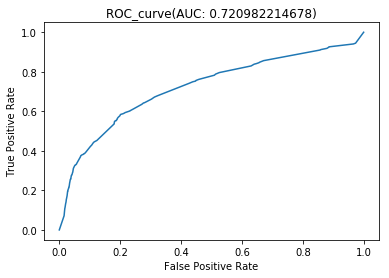

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
model_normal = classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
acc = accuracy_score(y_true = y_test, y_pred = predictions)

print('Accuracy score of original data', round(acc,3))
print('-----------------')
# using the confusion matric to find out the precision, recall and 
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

probs = model_normal.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

Accuracy score of Oversampled data 0.741
-----------------
True Positives: 1310
False Positive: 1774
True Negative: 6467
False Negative: 949
-----------------
Precision: 0.42
Recall: 0.58
AUC: 0.71997353519


####################################################


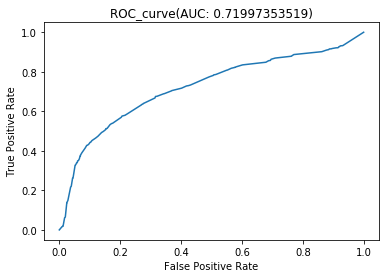

In [72]:
# Fit the oversampling data into the same classifier
model_over = classifier.fit(X_train_over, y_train_over)
predictions_over = classifier.predict(X_test)
acc_over = accuracy_score(y_true = y_test, y_pred = predictions_over)
print('Accuracy score of Oversampled data', round(acc_over,3))
print('-----------------')
TP = np.sum(np.logical_and(predictions_over == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_over == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_over == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_over == 0, y_test == 1))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

probs = model_over.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

In [28]:
# Down-sampling the '0' data till it has same amount of '1' data
df_minority_downSampling = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=4377,    # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_minority_downSampling = pd.concat([df_minority_downSampling, df_minority])
# Display new class counts
df_minority_downSampling.DEF_PAY.value_counts()

1    4377
0    4377
Name: DEF_PAY, dtype: int64

In [29]:
y_train_down = df_minority_downSampling['DEF_PAY']
X_train_down =df_minority_downSampling.drop('DEF_PAY',1)
y_train_down.shape

(8754,)

Accuracy score of Downsampled data 0.699619047619
-----------------
True Positives: 1472
False Positive: 2367
True Negative: 5874
False Negative: 787
-----------------
Precision: 0.38
Recall: 0.65
AUC: 0.710276262046


####################################################


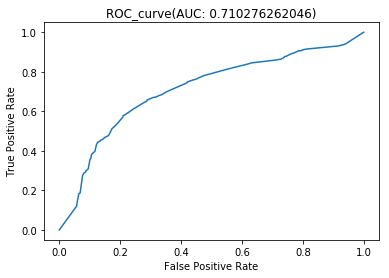

In [73]:
# Fit the downsampling data into the same classifier
model_down = classifier.fit(X_train_down, y_train_down)
predictions_down = classifier.predict(X_test)
acc_down = accuracy_score(y_true = y_test, y_pred = predictions_down)
print('Accuracy score of Downsampled data', acc_down)
print('-----------------')

TP = np.sum(np.logical_and(predictions_down == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_down == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_down == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_down == 0, y_test == 1))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

probs = model_down.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
sm = SMOTE(random_state=589, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Accuracy score of Oversampled data 0.75
-----------------
True Positives: 1212
False Positive: 1578
True Negative: 6663
False Negative: 1047
-----------------
Precision: 0.43
Recall: 0.54
AUC: 0.717856586704


####################################################


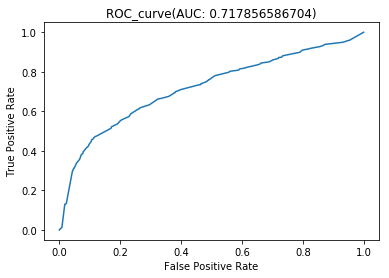

In [74]:
# Fit the downsampling data into the same classifier
model_SMOTE = classifier.fit(X_SMOTE, y_SMOTE)
predictions_SMOTE = classifier.predict(X_test)
acc_SMOTE = accuracy_score(y_true = y_test, y_pred = predictions_SMOTE)
print('Accuracy score of Oversampled data', acc_SMOTE)
print('-----------------')
TP = np.sum(np.logical_and(predictions_SMOTE == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_SMOTE == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_SMOTE == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_SMOTE == 0, y_test == 1))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

probs = model_SMOTE.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

## Select ensemble algorithm to increase accuracy
<br />
There are two ensembling algorithms are very common to use, bagging and boosting. 

Bagging, developed by Breiman(1996), is a machine-learning method that uses boostrapping to creat multiple training datasets from given datasets. Random forest algorithms is a typical bagging algorithm.

Boosting, especially the populer one AdaBoosting, proposed by Freund and Schapire(1996) is a sequential learning method. It on the basis of supervised learning, weights are successively adjusted and multiple learning results are sought.

*  Ada-Boost algorithm 
*  Random Forest algorithm

Accuracy score of Oversampled data 0.794952380952
True Positives: 1122
False Positive: 1016
True Negative: 7225
False Negative: 1137
-----------------
Precision: 0.52
Recall: 0.5
F-score: 0.51
AUC: 0.759


####################################################


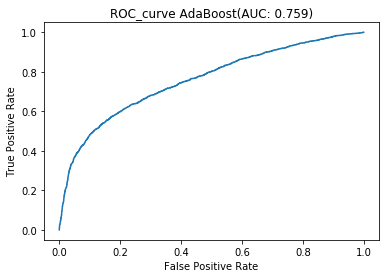

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
ADA.fit(X_SMOTE, y_SMOTE)
predictions_ADA = ADA.predict(X_test)
acc_ADA = accuracy_score(y_true = y_test, y_pred = predictions_ADA)
print('Accuracy score of Oversampled data', acc_ADA)

TP = np.sum(np.logical_and(predictions_ADA == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_ADA == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_ADA == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_ADA == 0, y_test == 1))

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('F1-score: {}'.format(round((2*recall*precision)/(recall+precision),2)))
model = ADA.fit(X_SMOTE, y_SMOTE)
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC = round(auc(fpr, tpr),3) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve AdaBoost' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()

Accuracy score of Oversampled data 0.803047619048
True Positives: 1050
False Positive: 859
True Negative: 7382
False Negative: 1209
-----------------
Precision: 0.55
Recall: 0.46
F1-score: 0.504
AUC: 0.761


####################################################


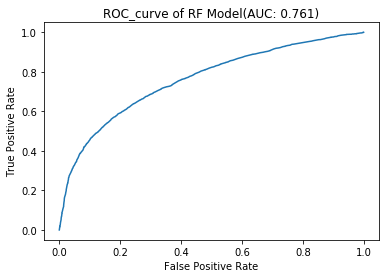

In [78]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
model = RF_Model.fit(X_SMOTE, y_SMOTE)
predictions_RF_Model = RF_Model.predict(X_test)
acc_RF_Model = accuracy_score(y_true = y_test, y_pred = predictions_RF_Model)
print('Accuracy score of Oversampled data', acc_RF_Model)

TP = np.sum(np.logical_and(predictions_RF_Model == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions_RF_Model == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions_RF_Model == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions_RF_Model == 0, y_test == 1))

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('-----------------')
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print("F1-score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions_RF_Model),3)))

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
from sklearn.metrics import auc  
AUC =  round(auc(fpr, tpr),3) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
plt.plot(fpr, tpr)  
plt.title('ROC_curve of RF Model' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()